# Data Set

1.6 million UK traffic accidents

In [2]:
import numpy as np
import pandas as pd
%pylab inline
from datetime import datetime
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


D:\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [4]:
# Reading different dataframes and dropping duplicates
accidents_12_14 = pd.read_csv('C:\\Users\\yasin\\OneDrive\\Masaüstü\\UK_Traffic\\accidents_2012_to_2014.csv', low_memory=False)
accidents_09_11 = pd.read_csv('C:\\Users\\yasin\\OneDrive\\Masaüstü\\UK_Traffic\\accidents_2009_to_2011.csv', low_memory=False)
accidents_05_07 = pd.read_csv('C:\\Users\\yasin\\OneDrive\\Masaüstü\\UK_Traffic\\accidents_2005_to_2007.csv', low_memory=False)
accidents_12_14 = accidents_12_14.drop_duplicates()
accidents_09_11 = accidents_09_11.drop_duplicates()
accidents_05_07 = accidents_05_07.drop_duplicates()

In [7]:
accidents = pd.concat([accidents_05_07, accidents_09_11, accidents_12_14])

In [8]:
accidents.drop('Junction_Detail', axis=1, inplace=True)

# Filling NA values for location as 0.0
accidents['Location_Easting_OSGR'].fillna(0.0, inplace=True)
accidents['Location_Northing_OSGR'].fillna(0.0, inplace=True)
accidents['Longitude'].fillna(0.0, inplace=True)
accidents['Latitude'].fillna(0.0, inplace=True)

In [9]:
accidents['Junction_Control'].fillna('Unknown', inplace=True)
accidents['Pedestrian_Crossing-Human_Control'].fillna('Unknown', inplace=True)
accidents['Pedestrian_Crossing-Physical_Facilities'].fillna('Unknown', inplace=True)
accidents['Weather_Conditions'].fillna('Unknown', inplace=True)
accidents['Road_Surface_Conditions'].fillna('Unknown', inplace=True)
accidents['Special_Conditions_at_Site'].fillna('Unknown', inplace=True)
accidents['Carriageway_Hazards'].fillna('Unknown', inplace=True)
accidents['Did_Police_Officer_Attend_Scene_of_Accident'].fillna('Unknown', inplace=True)
accidents['LSOA_of_Accident_Location'].fillna('Unknown', inplace=True)

In [10]:
# Saat cinsinden Saat sütununun ortalama değerini bulun
t = accidents['Time'].map(str).map(lambda x: x.split(':')[0])
t = t[t != 'nan'].map(int)
int(ceil(t.mean()))

14

In [11]:
# Yeni bir 'saat' sütunu ekleme ve 'nans'ı ortalama değerle değiştirme
accidents['Hour'] = accidents['Time'].map(str).map(lambda x: x.split(':')[0])
accidents['Hour'].replace('nan', 14, inplace= True)
accidents['Hour'] = accidents['Hour'].map(int)
accidents.drop('Time', inplace=True, axis=1)

In [12]:
accidents['Date'] = pd.to_datetime(accidents['Date'], format = '%d/%m/%Y')


In [13]:
# Havanın rüzgarlı olup olmadığını kontrol etme
def isWindy(weather):
    if 'with high winds' in weather:
        return 'Yes'
    elif 'without high winds' in weather:
        return 'No'
    else:
        return "Unknown"

In [14]:
accidents['Wind'] = accidents['Weather_Conditions'].map(isWindy)

In [15]:
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].map(lambda x: x.split()[0])
accidents['Weather_Conditions'].replace('Other', 'Unknown', inplace=True)

In [16]:
accidents = accidents.reset_index().drop('index', axis=1)

In [17]:
accidents.shape

(1469995, 33)

In [18]:
accidents.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Wind
1469990,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,2014-12-07,...,Snowing,Snow,None,None,2,Yes,Unknown,2014,22,No
1469991,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,2014-12-11,...,Fine,Snow,None,None,2,Yes,Unknown,2014,6,No
1469992,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,2014-12-09,...,Fine,Frost/Ice,None,None,2,Yes,Unknown,2014,2,No
1469993,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,2014-12-17,...,Raining,Wet/Damp,None,None,2,Yes,Unknown,2014,6,No
1469994,2.01E+12,314072.0,579971.0,-3.348426,55.106700,98,3,2,2,2014-12-24,...,Fine,Wet/Damp,None,None,2,Yes,Unknown,2014,15,No


In [19]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469995 entries, 0 to 1469994
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Accident_Index                               1469995 non-null  object        
 1   Location_Easting_OSGR                        1469995 non-null  float64       
 2   Location_Northing_OSGR                       1469995 non-null  float64       
 3   Longitude                                    1469995 non-null  float64       
 4   Latitude                                     1469995 non-null  float64       
 5   Police_Force                                 1469995 non-null  int64         
 6   Accident_Severity                            1469995 non-null  int64         
 7   Number_of_Vehicles                           1469995 non-null  int64         
 8   Number_of_Casualties                         1469995

In [20]:
# Tüm boş değerler kaldırıldı
sum(accidents.isna())

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-

In [21]:
# kategorik değişkenleri dönüştürme
accidents['Accident_Severity'].replace([1, 2, 3],['Fatal', 'Severe', 'Slight'], inplace=True)
accidents['Day_of_Week'].replace([1,2,3,4,5,6,7],['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], inplace=True)

In [22]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Wind
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,Severe,1,1,2005-01-04,...,Raining,Wet/Damp,None,None,1,Yes,E01002849,2005,17,No
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,Slight,1,1,2005-01-05,...,Fine,Dry,None,None,1,Yes,E01002909,2005,17,No
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,Slight,2,1,2005-01-06,...,Fine,Dry,None,None,1,Yes,E01002857,2005,0,No
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,Slight,1,1,2005-01-07,...,Fine,Dry,None,None,1,Yes,E01002840,2005,10,No
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,Slight,1,1,2005-01-10,...,Fine,Wet/Damp,None,None,1,Yes,E01002863,2005,21,No


<AxesSubplot:>

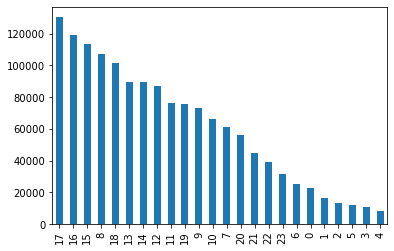

In [23]:
accidents['Hour'].value_counts().plot(kind='bar')

<AxesSubplot:>

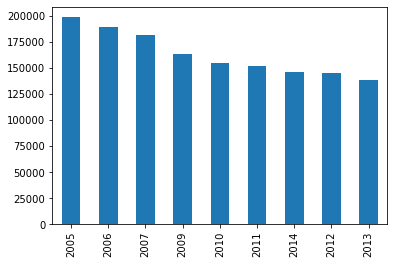

In [24]:
accidents['Year'].value_counts().plot(kind='bar')

In [30]:
mask_accident_severity = accidents['Accident_Severity'] == 'Slight'
accidents_filtered = accidents[~mask_accident_severity]
accidents_filtered.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Wind
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,Severe,1,1,2005-01-04,...,Raining,Wet/Damp,None,None,1,Yes,E01002849,2005,17,No
16,200501BS00019,524680.0,179450.0,-0.205139,51.500191,1,Severe,2,1,2005-01-20,...,Fine,Dry,None,None,1,Yes,E01002864,2005,0,No
19,200501BS00022,526790.0,178980.0,-0.174925,51.495498,1,Severe,1,1,2005-01-08,...,Fine,Dry,None,None,1,Yes,E01002821,2005,3,No
30,200501BS70003,523910.0,181390.0,-0.215545,51.517796,1,Severe,2,2,2005-02-01,...,Raining,Wet/Damp,None,None,1,Yes,E01002878,2005,17,No
52,200501BS70029,524100.0,181830.0,-0.212653,51.521709,1,Severe,1,1,2005-02-15,...,Fine,Dry,None,None,1,Yes,E01002905,2005,18,No


In [31]:
accidents_filtered['Year'].value_counts()

2005    27942
2006    27872
2007    27036
2009    24054
2011    22782
2012    22538
2014    22334
2010    22171
2013    21232
Name: Year, dtype: int64

<AxesSubplot:>

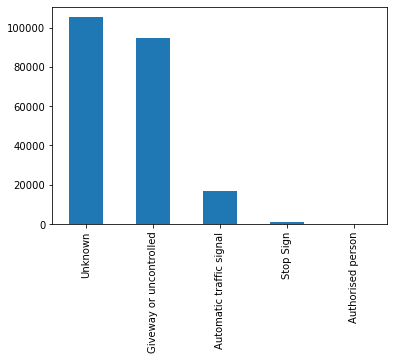

In [32]:
accidents_filtered['Junction_Control'].value_counts().plot(kind = 'bar')
#Trafik işareti koymanın bile kazaları 6 kat azalttığını net bir şekilde görebiliyoruz. 

In [33]:
#kavşak kontrolü ile haftanın günleri arasındaki ilişki
pd.pivot_table(accidents_filtered,index = 'Junction_Control',
                    columns = 'Day_of_Week', values = 'Accident_Index', aggfunc = 'count')

Day_of_Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Junction_Control,,,,,,,
Authorised person,41,29,41,29,35,39,42
Automatic traffic signal,2790,2287,2384,1911,2488,2439,2417
Giveway or uncontrolled,15307,12970,13274,11279,14058,13840,13840
Stop Sign,161,146,152,123,141,134,151
Unknown,16441,13941,16904,15574,14645,13947,13961


Belirli bir ilişki gözlemlenmedi

In [34]:
pd.pivot_table(accidents_filtered,index = 'Junction_Control',
                    columns = '1st_Road_Class', values = 'Accident_Index', aggfunc = 'count')

1st_Road_Class,1,2,3,4,5,6
Junction_Control,,,,,,
Authorised person,1.0,NaN,132.0,31.0,18.0,74.0
Automatic traffic signal,85.0,9.0,12053.0,1671.0,949.0,1949.0
Giveway or uncontrolled,757.0,82.0,42287.0,13408.0,8813.0,29221.0
Stop Sign,NaN,NaN,444.0,183.0,97.0,284.0
Unknown,5795.0,448.0,46416.0,14988.0,9619.0,28147.0


<AxesSubplot:>

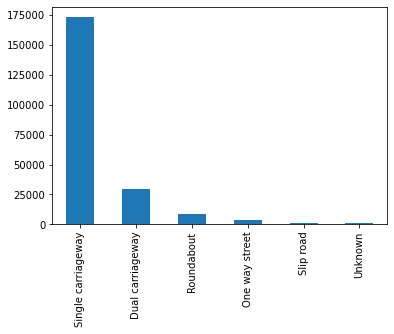

In [35]:
accidents_filtered['Road_Type'].value_counts().plot(kind = 'bar')


In [36]:
#kavşak kontrolü ile Road_Type arasındaki ilişki
pd.pivot_table(accidents_filtered,index = 'Junction_Control',
                    columns = 'Road_Type', values = 'Accident_Index', aggfunc = 'count')

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,Unknown
Junction_Control,,,,,,
Authorised person,30,5,15,197,3,6
Automatic traffic signal,4008,660,675,11215,108,50
Giveway or uncontrolled,7260,1865,8167,76161,808,307
Stop Sign,50,22,21,906,4,5
Unknown,18405,1444,96,84350,556,562


In [37]:
accidents_single_carr = accidents_filtered[accidents_filtered['Road_Type']=='Single carriageway']
accidents_single_carr

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Wind
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,Severe,1,1,2005-01-04,...,Raining,Wet/Damp,None,None,1,Yes,E01002849,2005,17,No
16,200501BS00019,524680.0,179450.0,-0.205139,51.500191,1,Severe,2,1,2005-01-20,...,Fine,Dry,None,None,1,Yes,E01002864,2005,0,No
19,200501BS00022,526790.0,178980.0,-0.174925,51.495498,1,Severe,1,1,2005-01-08,...,Fine,Dry,None,None,1,Yes,E01002821,2005,3,No
52,200501BS70029,524100.0,181830.0,-0.212653,51.521709,1,Severe,1,1,2005-02-15,...,Fine,Dry,None,None,1,Yes,E01002905,2005,18,No
85,200501BS70066,524830.0,179160.0,-0.203081,51.497552,1,Severe,2,1,2005-03-01,...,Raining,Wet/Damp,None,None,1,No,E01002814,2005,19,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469976,2.01E+12,319519.0,566948.0,-3.259393,54.990615,98,Severe,2,3,2014-09-27,...,Fine,Dry,None,None,2,Yes,Unknown,2014,14,No
1469980,2.01E+12,319657.0,566553.0,-3.257125,54.987088,98,Severe,2,1,2014-11-05,...,Unknown,Wet/Damp,None,None,2,No,Unknown,2014,15,Unknown
1469983,2.01E+12,310318.0,590421.0,-3.410558,55.199911,98,Severe,3,1,2014-11-17,...,Fine,Dry,None,None,2,Yes,Unknown,2014,16,No
1469986,2.01E+12,316306.0,568290.0,-3.309988,55.002141,98,Fatal,1,3,2014-11-25,...,Fine,Wet/Damp,None,None,2,Yes,Unknown,2014,15,No


<AxesSubplot:>

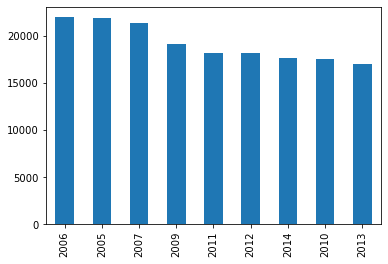

In [38]:
accidents_single_carr['Year'].value_counts().plot(kind='bar')

In [39]:
pd.pivot_table(accidents_filtered,index = 'Junction_Control',
                    columns = 'Speed_limit', values = 'Accident_Index', aggfunc = 'count')

Speed_limit,10,20,30,40,50,60,70
Junction_Control,,,,,,,
Authorised person,NaN,3.0,184.0,17.0,10.0,35.0,7.0
Automatic traffic signal,NaN,161.0,13589.0,1991.0,415.0,325.0,235.0
Giveway or uncontrolled,NaN,1178.0,64561.0,7522.0,2846.0,15118.0,3343.0
Stop Sign,NaN,15.0,588.0,104.0,45.0,247.0,9.0
Unknown,4.0,1079.0,44015.0,8406.0,4758.0,35379.0,11772.0


In [41]:
accidents_filtered.groupby(['Junction_Control'])[['Speed_limit']].mean()

,Speed_limit
Junction_Control,
Authorised person,36.523438
Automatic traffic signal,32.736899
Giveway or uncontrolled,37.482658
Stop Sign,39.484127
Unknown,46.132735


<AxesSubplot:ylabel='Number_of_Vehicles'>

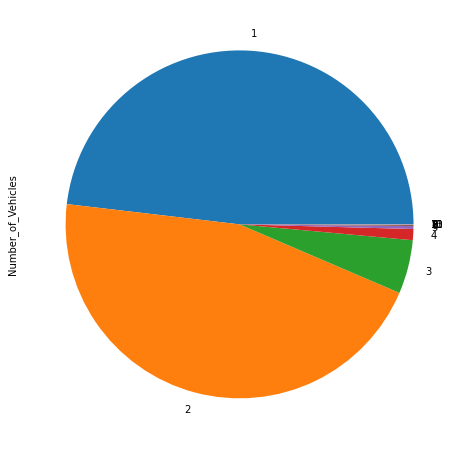

In [42]:
accidents_single_carr[accidents_single_carr['Speed_limit']==30]['Number_of_Vehicles'].value_counts().plot(kind = 'pie',figsize = (8,8))